# CLASE 6, CLASIFICACION MULTICLASE, ARBOLES DE DECISION Y VALIDACION CRUZADA

## CARGA DE DATOS

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

<IPython.core.display.Javascript object>


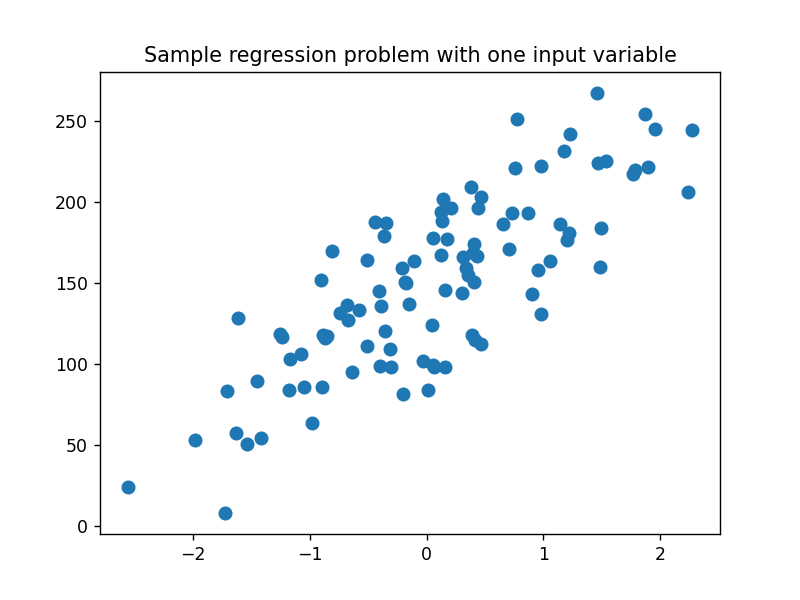

In [3]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


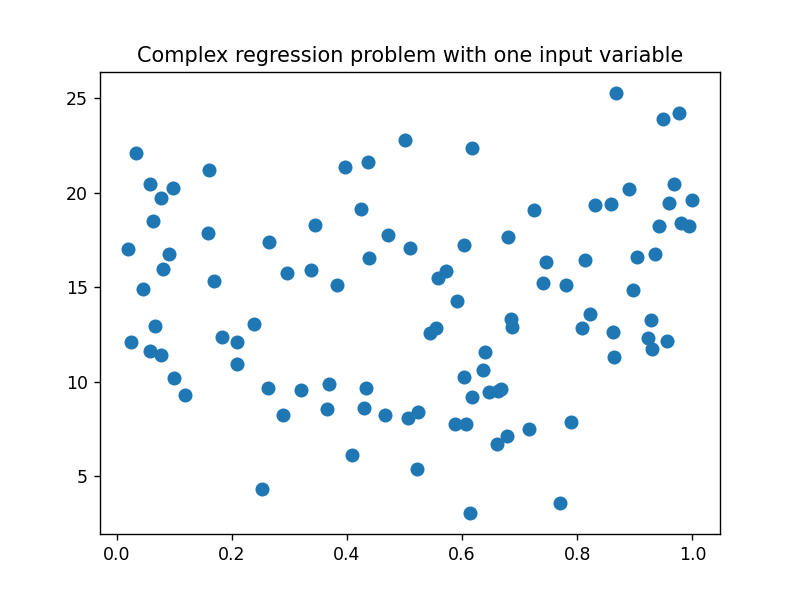

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

<IPython.core.display.Javascript object>


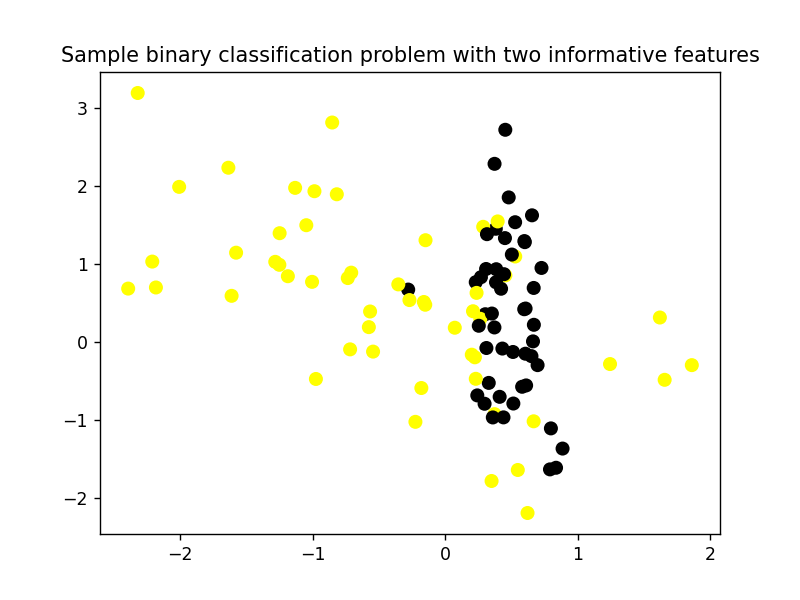

In [5]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


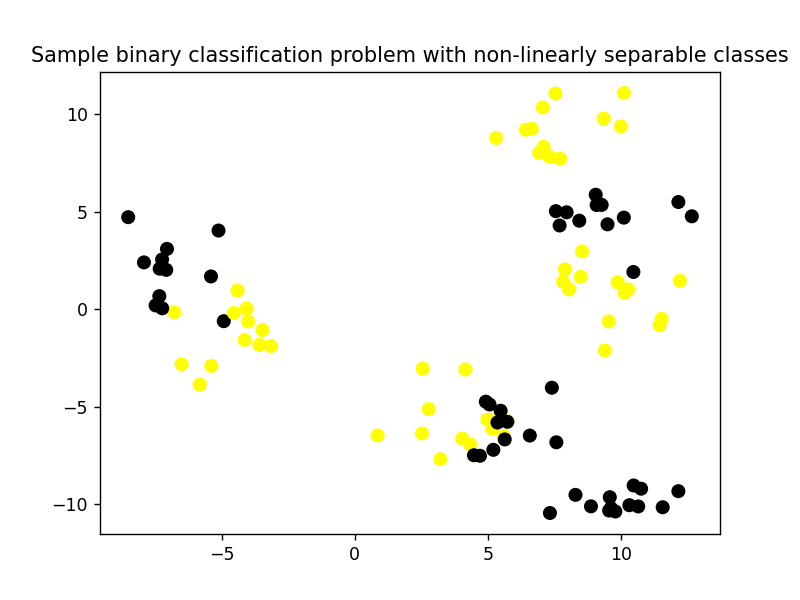

In [6]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [11]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [12]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [13]:
X_crime

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.00,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,...,29.8,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88
2211,12251,2.68,17.36,31.23,16.97,12.57,12251,100.00,20321,75.06,...,23.8,17.3,14.4,0,0,2.24,75.16,49.12,78.79,92.85
2212,32824,2.46,11.81,20.96,9.53,20.73,32824,100.00,27182,59.79,...,30.5,23.9,13.1,44,0,7.35,48.66,46.73,75.54,92.30
2213,13547,2.89,17.16,30.01,14.73,10.42,0,0.00,19899,71.67,...,26.2,23.3,14.1,0,0,2.28,82.26,54.05,79.72,94.06


In [14]:
y_crime

0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

### Clasificacion Multiclase con Modelos lineales

#### LinearSVC con M classes genera M  contra el resto


In [62]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_2d, random_state = 0)

#X_fruits_2d, y_fruits_2d

clf=LinearSVC(C=1, max_iter=10000, random_state=67).fit(X_train,y_train)

print(clf.coef_)
print(clf.intercept_)



[[-0.28  0.48]
 [-1.11  0.79]
 [-0.04  0.21]
 [ 1.01 -1.26]]
[-1.51  0.79 -1.68  0.38]


In [63]:
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.4666666666666667
0.75


In [64]:
clf.predict([[20, 4]])

array([4], dtype=int64)

In [65]:
from sklearn.linear_model import RidgeClassifier

clfR=RidgeClassifier().fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

[[-0.28  0.48]
 [-1.11  0.79]
 [-0.04  0.21]
 [ 1.01 -1.26]]
[-1.51  0.79 -1.68  0.38]
0.4666666666666667
0.75


In [66]:
from sklearn.linear_model import LogisticRegression

clfLR=LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
print(clfLR.coef_)
print(clfLR.intercept_)
print(clfLR.score(X_test, y_test))
print(clfLR.score(X_train, y_train))

[[-1.44  2.97]
 [-2.76 -0.93]
 [ 0.8   1.58]
 [ 3.4  -3.63]]
[ -8.48  24.48 -15.36  -0.64]
0.8
0.8409090909090909


In [67]:
X=fruits[['mass','width','height']]
y=fruits['fruit_label']

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=645)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.4666666666666667


In [68]:
from sklearn.model_selection import cross_val_score

clf=KNeighborsClassifier(n_neighbors=5)

X=X_fruits_2d.values
y=y_fruits_2d.values

cv_scores=cross_val_score(clf, X, y, cv=5)



In [69]:
print(cv_scores)

[0.75 0.75 0.83 0.83 0.82]


In [70]:
print(np.mean(cv_scores))

0.7969696969696971


<IPython.core.display.Javascript object>


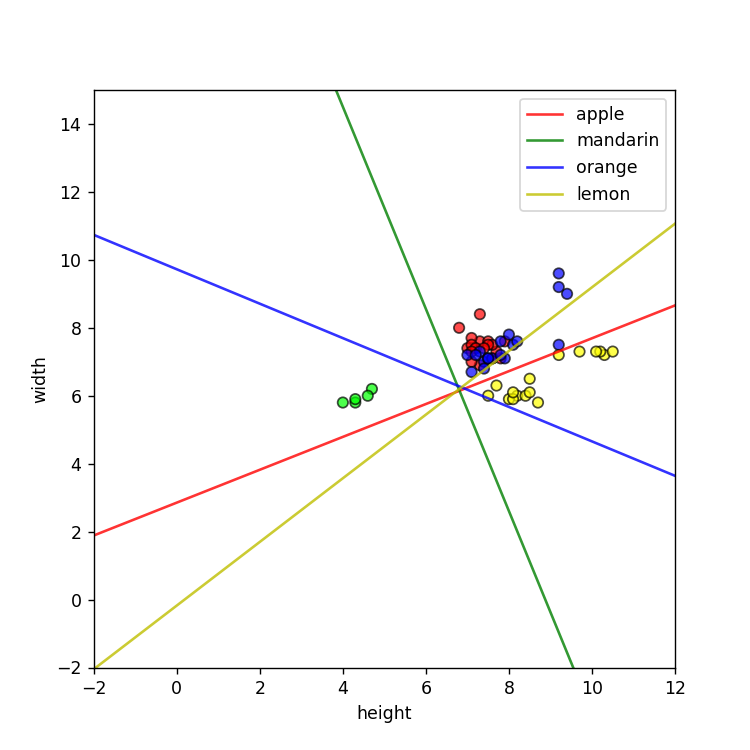

In [71]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clfLR.coef_, clfLR.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#param_range = np.logspace(-3, 3, 4)

param_range= [0.001, 0.1, 1, 1000]

train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=5)


In [73]:
print(train_scores)

[[0.47 0.4  0.4  0.34 0.33]
 [0.83 0.79 0.77 0.74 0.75]
 [0.83 0.85 0.83 0.81 0.85]
 [0.98 1.   0.98 1.   0.98]]


In [74]:
print(test_scores)

[[0.58 0.33 0.33 0.25 0.27]
 [0.83 0.67 0.67 0.75 0.73]
 [0.58 0.75 0.75 0.92 0.82]
 [0.33 0.33 0.25 0.33 0.36]]


<IPython.core.display.Javascript object>


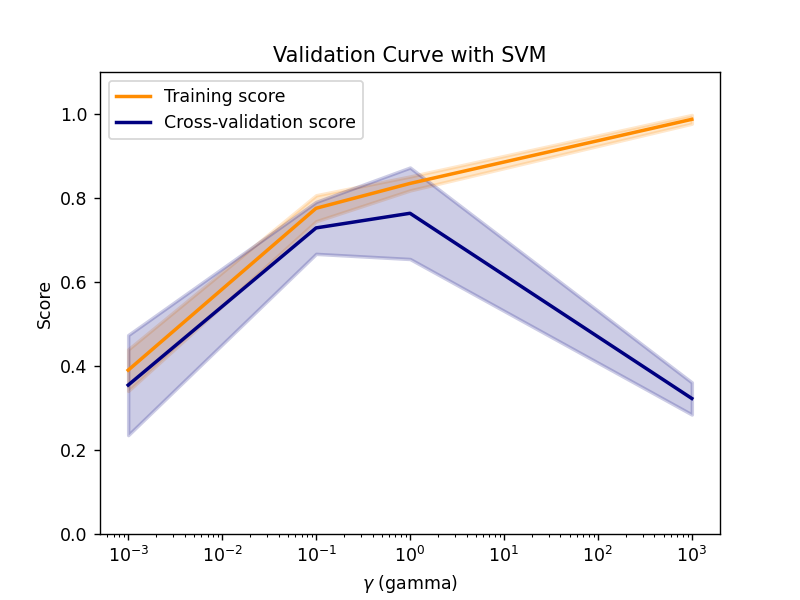

In [75]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()